Patient's Sickness Prediction System
Machine learning has been proven effective in the field of healthcare also. Traditional healthcare systems became increasingly challenging to cater to the needs of millions of patients. 
But, with the advent of ML, the paradigm shifted towards value-based treatment.
Every modern healthcare equipment and gadget comes with internal apps that can store patient's data. 
You can leverage these data to create a system that can predict the patient's ailment and forecast the admission. KenSci is an AI-based solution that can analyze clinical data and predict sickness along with more intelligent resource allocation.
 You can use open-source medical datasets like CHDS (Child Health and Development Studies), HCUP, Medicare to test your machine learning algorithm. You can incorporate such projects in healthcare wearables, telemedicine, remote monitoring, etc.
To develop such algorithms, you need to have a thorough understanding of the following:

a. Classification & Clustering model: While classification determines the categorization of data, clustering in ML looks for distinctive patterns in the data when the data available does not have a definite outcome.

b. Regression analysis: Its principal purpose is to find value. This technique talks about the predictive methods that your system will administer while interacting between dependent variables (target data) and independent variables (predictor data).

Use libraries like NumPy, Pandas, Matplotlib, Theano, etc., and frameworks like Keras and Hugging face to implement this ML project.

About Dataset
This dataset provides a comprehensive overview of various factors associated with heart attack risks. It includes detailed information on patients' medical history, lifestyle habits, and physiological measurements. The data has been collected from multiple reputable medical studies and hospital records, ensuring a diverse and accurate representation of heart attack risk factors across different demographics.

The dataset comprises key indicators such as age, gender, cholesterol levels, blood pressure, smoking status, and more. It also includes target labels indicating whether the patient experienced a heart attack, enabling users to explore and analyze patterns in the data.

This dataset can serve as a valuable resource for healthcare professionals, researchers, and data scientists interested in studying cardiovascular health. It is designed to help in the development of predictive models, risk assessment tools, and public health strategies to better understand and prevent heart attacks.

Feel free to explore the dataset and uncover insights that could contribute to improved health outcomes and preventative measures.

The dataset file, titled heart_attack_risk_factors.csv, contains structured data on various factors related to heart attack risks. It includes the following columns:
1. Age: The age of the patient.
2. Sex: The gender of the patient (1 = male, 0 = female).
3. Chest Pain Type: The type of chest pain experienced (ranging from 0 to 3, indicating different severity levels).
4. Resting Blood Pressure: The patient's resting blood pressure in mm Hg.
5. Cholesterol: The patient's serum cholesterol level in mg/dl.
6. Fasting Blood Sugar: Indicates whether the patient's fasting blood sugar is greater than 120 mg/dl (1 = true, 0 = false).
7. Resting Electrocardiographic Results: ECG results (values ranging from 0 to 2, indicating different results).
8. Maximum Heart Rate Achieved: The maximum heart rate achieved during exercise.
9. Exercise Induced Angina: Indicates if the patient experienced angina during exercise (1 = yes, 0 = no).
10. Oldpeak: Depression induced by exercise relative to rest.
11. Slope of the Peak Exercise ST Segment: Slope of the peak exercise ST segment (values range from 0 to 2).
Number of Major Vessels Colored by Fluoroscopy: Number of major vessels (0–3) colored by fluoroscopy.
12. Thal: A blood disorder status (0 = normal, 1 = fixed defect, 2 = reversible defect).
13. Target: Indicates the presence of heart disease (1 = heart disease, 0 = no heart disease).

This file is designed to facilitate analysis and machine learning modeling, offering a rich set of features for exploring the relationship between various risk factors and heart attack outcomes. It is provided in CSV format for easy accessibility and integration with data analysis tools.

In [9]:
# To silence warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing neccesary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('heart_attack_dataset.csv')

In [5]:
df.head(20)

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication
5,Female,66,125,271,Yes,Former,Typical Angina,Coronary Artery Bypass Graft (CABG)
6,Male,33,181,262,Yes,Current,Asymptomatic,Lifestyle Changes
7,Male,84,182,288,No,Current,Non-anginal Pain,Lifestyle Changes
8,Male,73,115,286,Yes,Never,Asymptomatic,Angioplasty
9,Female,63,174,254,Yes,Former,Non-anginal Pain,Angioplasty


In [6]:
df.shape

(1000, 8)

In [7]:
df['Treatment'].value_counts()

Treatment
Lifestyle Changes                      269
Coronary Artery Bypass Graft (CABG)    252
Angioplasty                            247
Medication                             232
Name: count, dtype: int64

In [19]:
df['Age'].value_counts()

Age
71    31
77    29
86    27
49    26
58    25
88    25
64    24
55    24
41    24
45    23
54    23
46    21
78    21
39    21
36    21
74    20
40    20
82    20
66    20
34    20
80    19
37    19
83    18
32    17
70    17
84    17
33    17
81    16
62    16
67    16
48    16
50    15
60    15
69    15
85    15
76    15
79    14
89    14
52    14
51    14
44    14
42    13
72    13
75    13
61    13
73    13
53    12
63    12
35    11
68    11
57    11
56    10
43    10
59     9
31     9
30     9
47     9
38     8
65     8
87     8
Name: count, dtype: int64

In [8]:
df.describe(include = 'all')

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
count,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000
unique,2,NaN,NaN,NaN,2,3,4,4
top,Female,NaN,NaN,NaN,Yes,Never,Non-anginal Pain,Lifestyle Changes
freq,510,NaN,NaN,NaN,517,352,261,269
mean,NaN,60.338000,145.440000,223.789000,NaN,NaN,NaN,NaN
std,NaN,17.317496,31.756525,42.787817,NaN,NaN,NaN,NaN
min,NaN,30.000000,90.000000,150.000000,NaN,NaN,NaN,NaN
25%,NaN,45.000000,118.000000,185.000000,NaN,NaN,NaN,NaN
50%,NaN,60.500000,146.000000,225.500000,NaN,NaN,NaN,NaN
75%,NaN,76.000000,173.000000,259.000000,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


In [9]:
df.describe(include = 'object')

,Gender,Has Diabetes,Smoking Status,Chest Pain Type,Treatment
count,1000,1000,1000,1000,1000
unique,2,2,3,4,4
top,Female,Yes,Never,Non-anginal Pain,Lifestyle Changes
freq,510,517,352,261,269


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We have no missing values. That's great!

Sampling the Dataset

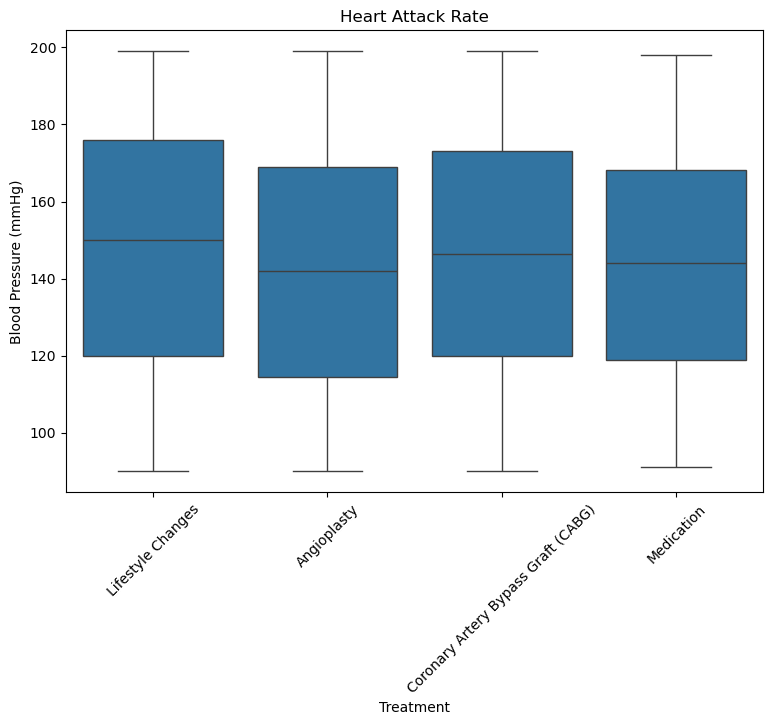

In [12]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Treatment', y='Blood Pressure (mmHg)', data=df)
plt.title('Heart Attack Rate')
plt.xticks(rotation=45)
plt.show()

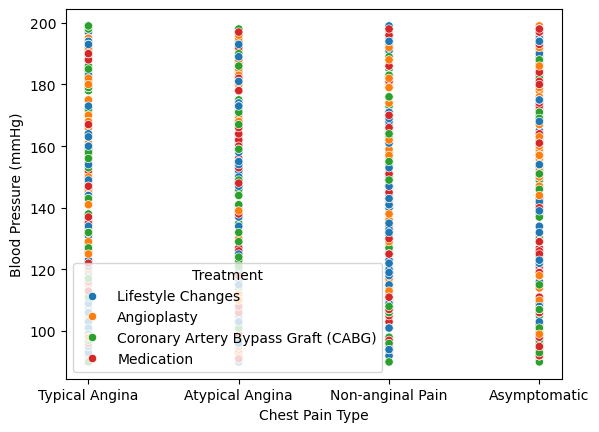

In [13]:
sns.scatterplot(x='Chest Pain Type', y='Blood Pressure (mmHg)', data=df, hue='Treatment')
plt.show()

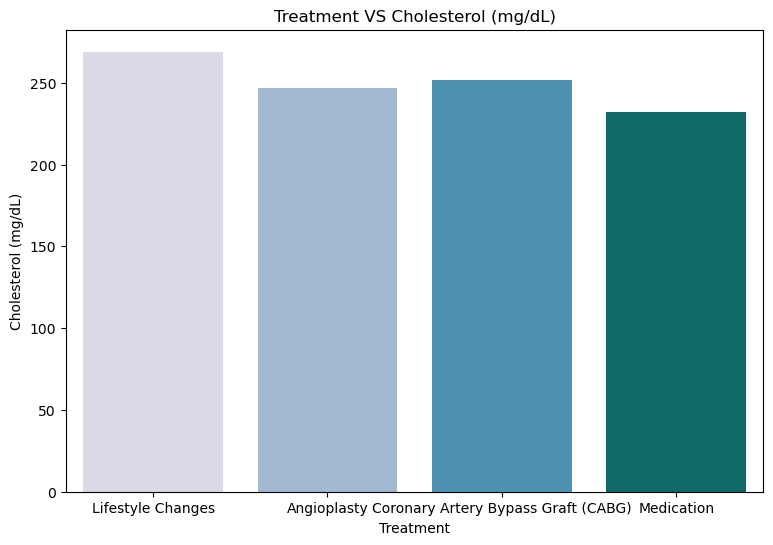

In [14]:
plt.figure(figsize=(9, 6))
sns.countplot(x='Treatment', data=df, palette='PuBuGn')
plt.title('Treatment VS Cholesterol (mg/dL)')
plt.xlabel('Treatment')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

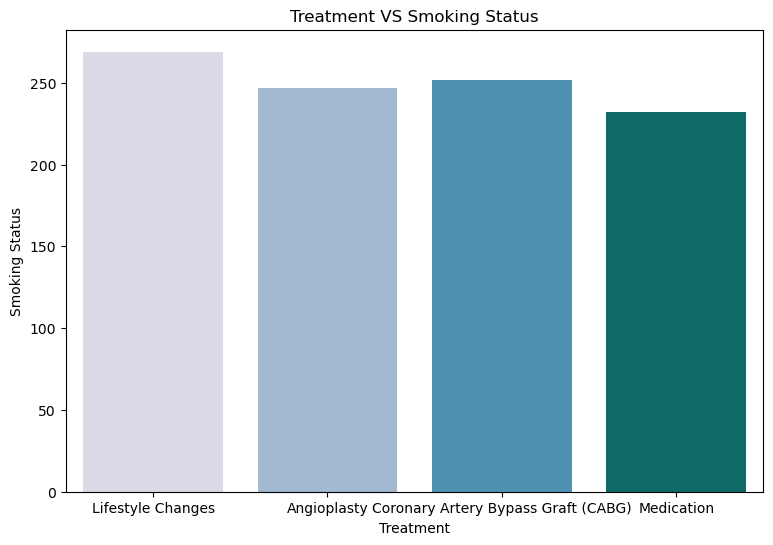

In [16]:
plt.figure(figsize=(9, 6))
sns.countplot(x='Treatment', data=df, palette='PuBuGn')
plt.title('Treatment VS Smoking Status')
plt.xlabel('Treatment')
plt.ylabel('Smoking Status')
plt.show()

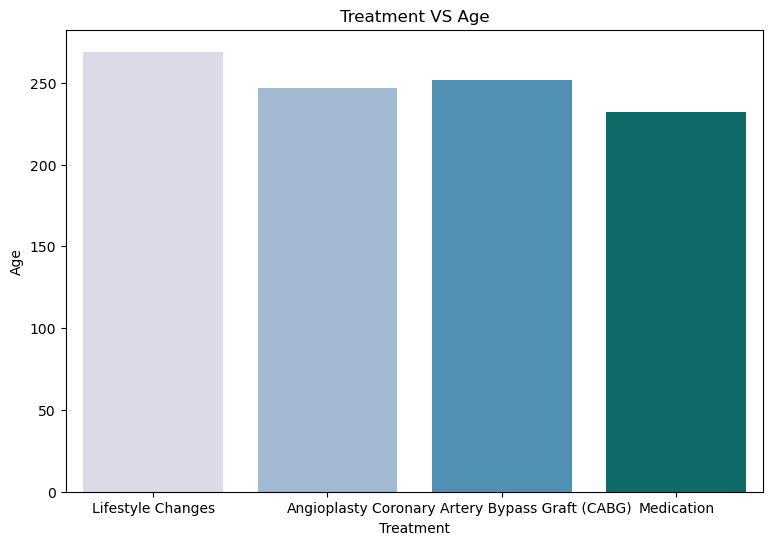

In [22]:
plt.figure(figsize=(9, 6))
sns.countplot(x='Treatment', data=df, palette='PuBuGn')
plt.title('Treatment VS Age')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.show()

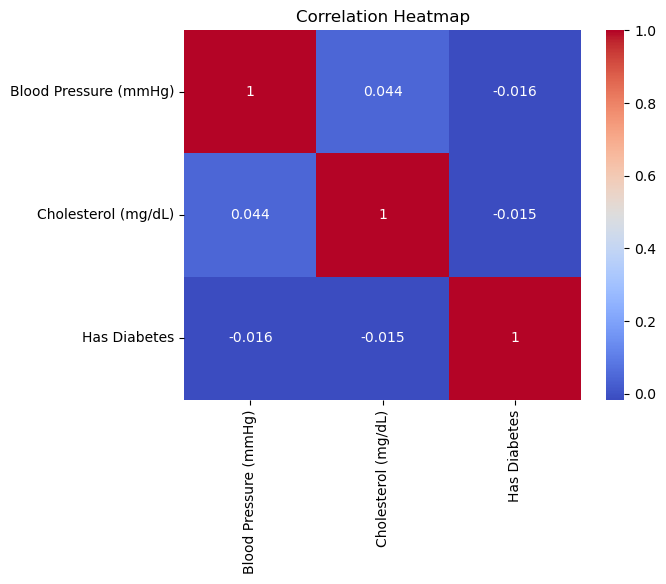

In [23]:
# Heatmap of the correlation between different variables.

corr_matrix = df[['Blood Pressure (mmHg)', 'Cholesterol (mg/dL)', 'Has Diabetes']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Insights:

The correlation between Blood Pressure (mmHg) and Cholesterol (mg/dL) is relatively weak, indicating that elevated blood pressure does not strongly predict high cholesterol levels. Similarly, the presence of both high blood pressure and high cholesterol in a patient does not necessarily indicate an association with diabetes.

In [ ]:
# Heatmap of the correlation between different variables.

corr_matrix = df[['gdpPercap', 'lifeExp', 'pop']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#Changing the Gender row from a categorical variable to a numerical variable
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
df['Has Diabetes'] = encoder.fit_transform(df['Has Diabetes'])
df['Smoking Status'] = encoder.fit_transform(df['Smoking Status'])
df['Chest Pain Type'] = encoder.fit_transform(df['Chest Pain Type'])

df

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,1,70,181,262,0,2,3,Lifestyle Changes
1,0,55,103,253,1,2,1,Angioplasty
2,1,42,95,295,1,0,3,Angioplasty
3,1,84,106,270,0,2,1,Coronary Artery Bypass Graft (CABG)
4,1,86,187,296,1,0,2,Medication
...,...,...,...,...,...,...,...,...
995,1,42,125,193,1,0,3,Angioplasty
996,1,80,186,267,1,2,1,Coronary Artery Bypass Graft (CABG)
997,0,64,108,174,1,0,2,Coronary Artery Bypass Graft (CABG)
998,0,84,123,195,0,0,0,Lifestyle Changes


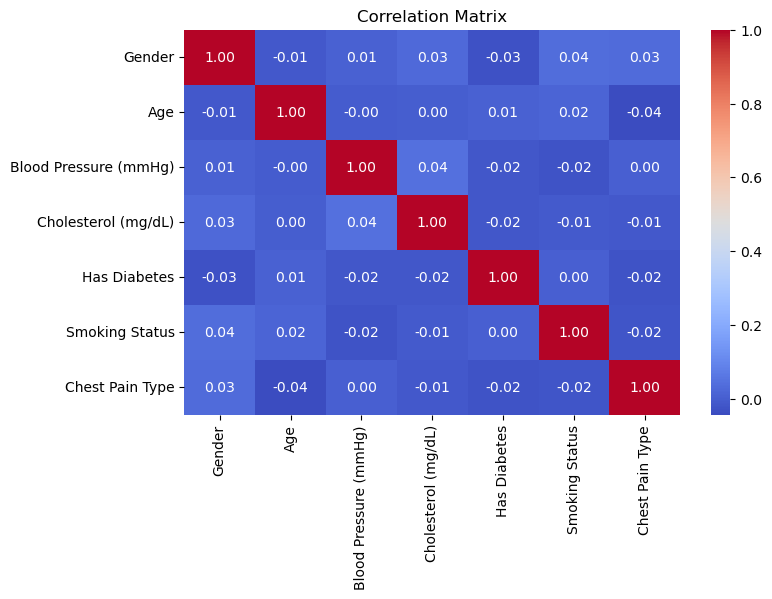

In [18]:
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Age Distribution -> The minimum age is 30 years, while the maximum is 89 years. The average age of individuals in the dataset is approximately 60.34 years. This indicates a wide range of ages with a slightly higher concentration in older adults.
Blood Pressure -> The minimum recorded blood pressure is 90 mmHg, and the maximum is 199 mmHg. The average blood pressure is 145.44 mmHg, suggesting a generally high average blood pressure level among the individuals in the dataset.
Cholesterol Levels -> Cholesterol levels range from a minimum of 150 mg/dL to a maximum of 299 mg/dL. The average cholesterol level is 223.79 mg/dL, indicating that most individuals have elevated cholesterol levels.

    Correlation:
Age and Blood Pressure: Almost no relationship, indicating age has a minimal impact on blood pressure.
Blood Pressure and Cholesterol: Very weak positive correlation, suggesting a minimal connection between these two variables.
Age and Cholesterol: Negligible correlation, indicating that age does not significantly influence cholesterol levels.

Modelling

Selecting my features and splitting the data into training and test sets.

In [24]:
# Split features (X) and target (y)
X = df.drop(columns=["Cholesterol (mg/dL)", "Has Diabetes", "Gender", "Treatment"])
y = df['Treatment']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

In [25]:
print(X_train.columns)

Index(['Age', 'Blood Pressure (mmHg)', 'Smoking Status', 'Chest Pain Type'], dtype='object')


In [26]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [27]:
rf_classifier = RandomForestClassifier(class_weight='balanced')

# Fit the model to the training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

In [58]:
# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score:
0.2477777777777778
Classification Report:
                                     precision    recall  f1-score   support

                        Angioplasty       0.22      0.25      0.23       218
Coronary Artery Bypass Graft (CABG)       0.24      0.22      0.23       230
                  Lifestyle Changes       0.26      0.35      0.30       238
                         Medication       0.30      0.16      0.21       214

                           accuracy                           0.25       900
                          macro avg       0.25      0.25      0.24       900
                       weighted avg       0.25      0.25      0.24       900

Confusion Matrix:
[[54 49 89 26]
 [75 50 79 26]
 [66 59 84 29]
 [51 51 77 35]]


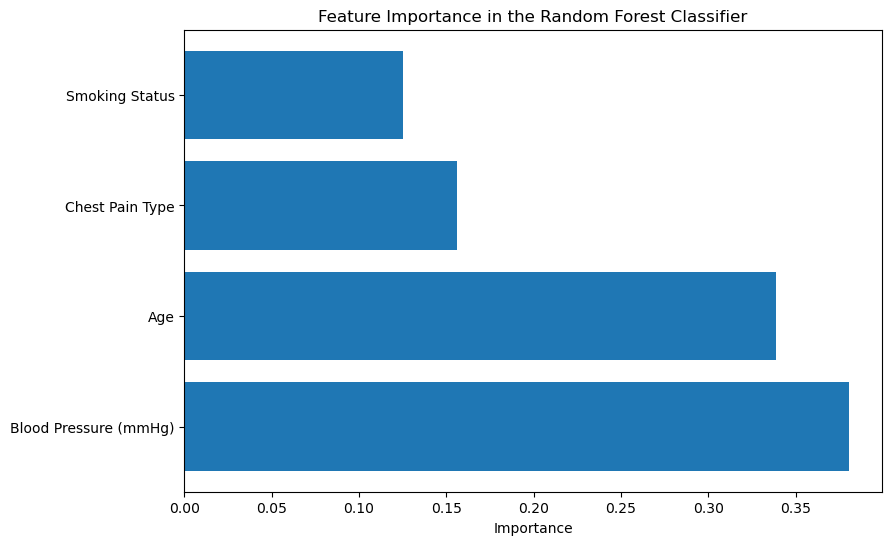

In [28]:
# Feature Importance

feature_importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(9, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in the Random Forest Classifier')
plt.show()

In [29]:
log_model= LogisticRegression(penalty = 'l2', C = 0.4, solver = 'liblinear')
log_model.fit(X_train,y_train)

LogisticRegression(C=0.4, solver='liblinear')

In [30]:
logy_pred = log_model.predict(X_test)

In [31]:
ACC = accuracy_score(logy_pred, y_test)
conf_mat = confusion_matrix(logy_pred, y_test)
class_report = classification_report(logy_pred, y_test)
print(ACC)
print(conf_mat)
print(class_report)

0.2511111111111111
[[  3   1   0   2]
 [ 32  25  38  27]
 [165 178 171 156]
 [ 28  24  23  27]]
                                     precision    recall  f1-score   support

                        Angioplasty       0.01      0.50      0.03         6
Coronary Artery Bypass Graft (CABG)       0.11      0.20      0.14       122
                  Lifestyle Changes       0.74      0.26      0.38       670
                         Medication       0.13      0.26      0.17       102

                           accuracy                           0.25       900
                          macro avg       0.25      0.31      0.18       900
                       weighted avg       0.58      0.25      0.32       900



In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=100) #build our knn classifier

knn.fit(X_train,y_train) #Training KNN classifier

y_pred=knn.predict(X_test)  #Testing

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score:
0.2577777777777778
Classification Report:
                                     precision    recall  f1-score   support

                        Angioplasty       0.00      0.00      0.00       228
Coronary Artery Bypass Graft (CABG)       0.00      0.00      0.00       228
                  Lifestyle Changes       0.26      1.00      0.41       232
                         Medication       0.00      0.00      0.00       212

                           accuracy                           0.26       900
                          macro avg       0.06      0.25      0.10       900
                       weighted avg       0.07      0.26      0.11       900

Confusion Matrix:
[[  0   0 228   0]
 [  0   0 228   0]
 [  0   0 232   0]
 [  0   0 212   0]]


In [33]:
joblib.dump(knn, 'HeartRisk.pkl')

['HeartRisk.pkl']

In [34]:
# Create the file Heart_Attack_Risk_Assessment.py in write mode
with open("Heart_Attack_Risk_Assessment.py", "w") as file:
    # Writing the Streamlit code into the file
    file.write("""
# Import necessary libraries

# Import necessary libraries
import streamlit as st
import pandas as pd
import joblib

# Load the pre-trained model
model = joblib.load("HeartRisk.pkl")  

# Set up the Streamlit app
st.title('Heart Attack Risk Assessment')
st.write("This app predicts the risk of heart attack/disease based on treatment.")

# Input fields for user to enter feature values
# Input field for Gender
gender = st.selectbox('Select Gender:', options=['Male', 'Female', 'Other'])

# Encoding the selected gender
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
gender_encoded = gender_mapping[gender]

Age = st.number_input('Age (AGE)', min_value=1.0, max_value=100.0, value= 100.0, step=0.1)
BloodPressure = st.number_input('Blood Pressure (mmHg) (BLOOD_PRESSURE(mmHg))', min_value=0.0, max_value=150.0,value = 10.0, step=0.1)
Cholesterol  = st.number_input('Cholesterol (mg/dL) (CHOLESTEROL)', min_value=0.0, max_value=100.0,value = 100.0, step=0.1)
# Input field for Diabetes
Diabetes = st.selectbox('Does the person have Diabetes?', options=['No', 'Yes'])

# Map the selected option to a numeric value
diabetes_mapping = {'No': 0, 'Yes': 1}
diabetes_encoded = diabetes_mapping[diabetes]

SmokingStatus = st.number_input('Smoking Status (SMOKING_STATUS)', min_value=0.0, max_value=10.0, value = 10.0, step=1.0)
ChestPainType = st.number_input('Chest Pain Type (CHEST_PAIN_TYPE)', min_value=0.0, max_value=10.0, value=5.0, step=1.0)

st.write(f"Encoded Gender: {gender_encoded}")
st.write(f"Encoded Diabetes Value: {diabetes_encoded}")

# Create a dictionary with the input data
input_data = {
    'Gender': Gender,
    'Age': age,
    'Blood Pressure (mmHg)': BloodPressure,
    'Cholesterol (mg/dL)': Cholesterol,
    'Has Diabetes': Diabetes,
    'Smoking Status': SmokingStatus,
    'Chest Pain Type': ChestPainType
}

# Convert the dictionary to a DataFrame
input_df = pd.DataFrame([input_data])

# Predict churn probability using the loaded model
if st.button('Predict Risk Of Heart Attack'):
   attack_prediction = model.predict_proba(input_df)[:, 1]  # Probability of churn
   attack_probability = round(prediction[0] * 100, 2)
st.write(f"The predicted heart attack/disease probability is {attack_probability}%")

# Option to display input data
if st.checkbox('Show Input Data'):
    st.write(input_df)

